In [1]:
import torch

In [4]:
torch.cuda.is_available()

False

In [22]:
a = torch.rand(4) # image (3, 4)
b = torch.rand(4)
a.shape

torch.Size([4])

In [23]:
a, b

(tensor([0.4312, 0.0979, 0.4514, 0.3944]),
 tensor([0.6715, 0.2471, 0.0307, 0.7009]))

In [25]:
# X = (m,n) -> x = (n)

c = torch.stack([a, b], dim = 1)
print(c.shape)
print(c)

torch.Size([4, 2])
tensor([[0.4312, 0.6715],
        [0.0979, 0.2471],
        [0.4514, 0.0307],
        [0.3944, 0.7009]])


# Generate Dataset

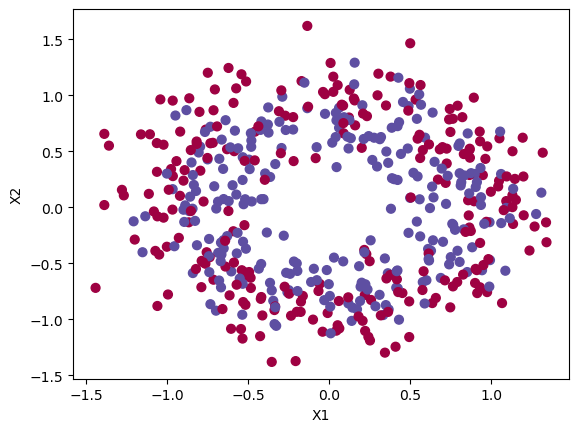

((500, 2), (500,))

In [367]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=500, noise = 0.2, random_state= 42)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [369]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([400, 2]),
 torch.Size([400]),
 torch.Size([100, 2]),
 torch.Size([100]))

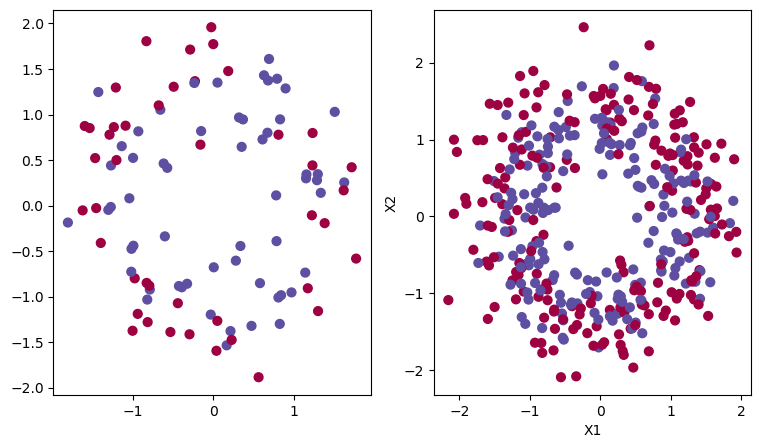

((500, 2), (500,))

In [370]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(9, 5))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 40, cmap = plt.cm.Spectral)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape

# Build Logistic using torch

In [371]:
class Logistic_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 1)
        

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 1)
       
        return z1
    
    
model = Logistic_model()
model
    

Logistic_model(
  (block_1): Linear(in_features=2, out_features=1, bias=True)
)

In [372]:
model.block_1.state_dict()

OrderedDict([('weight', tensor([[-0.5597, -0.2827]])),
             ('bias', tensor([-0.4503]))])

In [373]:
model(X_train).shape

torch.Size([400, 1])

# Train model

In [374]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2

y.backward(retain_graph=True)  # Allows multiple backward passes
print(x.grad)  # Should print 6

y.backward()  # Without retain_graph=True, this will cause an error
print(x.grad)  # Now it accumulates, printing 12

tensor(4.)
tensor(8.)


In [375]:
loss_function1 = torch.nn.BCELoss()
loss_function2 = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)    


In [ ]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 100

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()

    # Compute loss
    training_loss1 = loss_function1(y_hat_prob, y_train)
    training_loss2 = loss_function2(z.squeeze(), y_train)

    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)
        y_hat_prob_test = torch.sigmoid(z_test).squeeze()

        # Compute loss
        test_loss1 = loss_function1(y_hat_prob_test, y_test)
        test_loss2 = loss_function2(z_test.squeeze(), y_test)
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f} | {training_loss2.item():.4f} , Test Loss: {test_loss1.item():.4f} | {test_loss2.item():.4f}")

Epoch 1/100, Training Loss: 0.7478 | 0.7478 , Test Loss: 0.8290 | 0.8290
Epoch 2/100, Training Loss: 0.7455 | 0.7455 , Test Loss: 0.8252 | 0.8252
Epoch 3/100, Training Loss: 0.7432 | 0.7432 , Test Loss: 0.8215 | 0.8215
Epoch 4/100, Training Loss: 0.7410 | 0.7410 , Test Loss: 0.8179 | 0.8179
Epoch 5/100, Training Loss: 0.7389 | 0.7389 , Test Loss: 0.8144 | 0.8144
Epoch 6/100, Training Loss: 0.7369 | 0.7369 , Test Loss: 0.8110 | 0.8110
Epoch 7/100, Training Loss: 0.7350 | 0.7350 , Test Loss: 0.8077 | 0.8077
Epoch 8/100, Training Loss: 0.7331 | 0.7331 , Test Loss: 0.8045 | 0.8045
Epoch 9/100, Training Loss: 0.7313 | 0.7313 , Test Loss: 0.8014 | 0.8014
Epoch 10/100, Training Loss: 0.7296 | 0.7296 , Test Loss: 0.7984 | 0.7984
Epoch 11/100, Training Loss: 0.7279 | 0.7279 , Test Loss: 0.7954 | 0.7954
Epoch 12/100, Training Loss: 0.7263 | 0.7263 , Test Loss: 0.7926 | 0.7926
Epoch 13/100, Training Loss: 0.7248 | 0.7248 , Test Loss: 0.7899 | 0.7899
Epoch 14/100, Training Loss: 0.7234 | 0.7234 , 

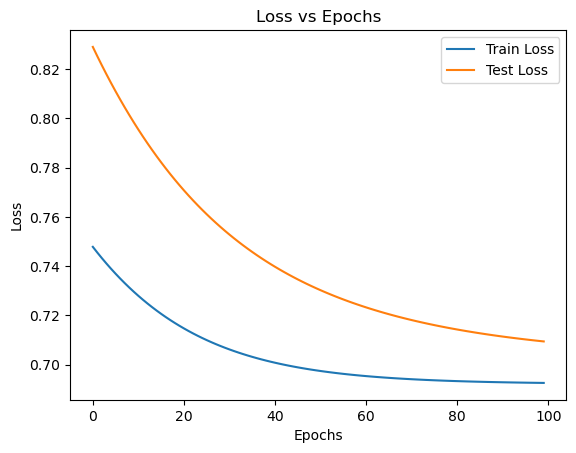

In [377]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## Plot

In [378]:
colors = ['green' if label == 1 else 'red' for label in y_train]
len(colors)

400

In [379]:
w0 = model.block_1.state_dict()['bias']
w1 = model.block_1.state_dict()['weight'][0][0]
w2 = model.block_1.state_dict()['weight'][0][1]

In [380]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]
x1.shape, x2.shape

(torch.Size([400]), torch.Size([400]))

In [381]:
z = model(X_train)
z.shape

torch.Size([400, 1])

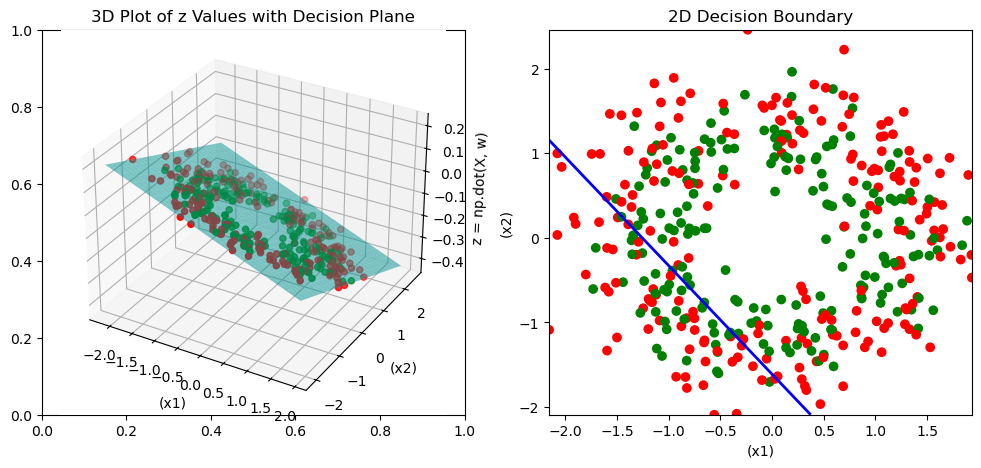

In [382]:
import numpy as np
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 30)
x2_range = torch.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w0 + w1 * X1_mesh + w2 * X2_mesh # model(X)
ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)


# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# # Compute decision boundary where z = 0
# x1_decision = torch.linspace(min(x1), max(x1), 100)
# x2_decision = (-w0 - w1 * x1_decision) / w2  # Solving w0 + w1*x1 + w2*x2 = 0

ax2.contour(X1_mesh, X2_mesh, Z_plane, levels=[0], colors='blue', linewidths=2)
# Plot decision boundary
#ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("(x1)")
ax2.set_ylabel("(x2)")
ax2.set_title("2D Decision Boundary")


# Show plot
plt.show()

# Build Neural Network

In [536]:
class Logistic_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 6)
        self.block_2 = torch.nn.Linear(6, 6)
        self.block_3 = torch.nn.Linear(6, 1)
        # self.block_4 = torch.nn.Linear(5, 1)

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 6) # w1 (6, 2)
        z2 = self.block_2(torch.relu(z1**2)) # (m, 5) # w2 (5, 6)
        z3 = self.block_3(torch.relu(z2)) # (m, 1) # w3 (1, 5)
        # z4 = self.block_4(torch.relu(z3))
        return z3
    
    
model = Logistic_model()
model

    

Logistic_model(
  (block_1): Linear(in_features=2, out_features=6, bias=True)
  (block_2): Linear(in_features=6, out_features=6, bias=True)
  (block_3): Linear(in_features=6, out_features=1, bias=True)
)

In [537]:
loss_function1 = torch.nn.BCELoss()
loss_function2 = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)   

In [538]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 1000

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()

    # Compute loss
    training_loss1 = loss_function1(y_hat_prob, y_train)
    training_loss2 = loss_function2(z.squeeze(), y_train)

    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)
        y_hat_prob_test = torch.sigmoid(z_test).squeeze()

        # Compute loss
        test_loss1 = loss_function1(y_hat_prob_test, y_test)
        test_loss2 = loss_function2(z_test.squeeze(), y_test)
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f} | {training_loss2.item():.4f} , Test Loss: {test_loss1.item():.4f} | {test_loss2.item():.4f}")

Epoch 1/1000, Training Loss: 0.7549 | 0.7549 , Test Loss: 0.7571 | 0.7571
Epoch 2/1000, Training Loss: 0.7448 | 0.7448 , Test Loss: 0.7503 | 0.7503
Epoch 3/1000, Training Loss: 0.7371 | 0.7371 , Test Loss: 0.7450 | 0.7450
Epoch 4/1000, Training Loss: 0.7311 | 0.7311 , Test Loss: 0.7408 | 0.7408
Epoch 5/1000, Training Loss: 0.7263 | 0.7263 , Test Loss: 0.7374 | 0.7374
Epoch 6/1000, Training Loss: 0.7225 | 0.7225 , Test Loss: 0.7345 | 0.7345
Epoch 7/1000, Training Loss: 0.7192 | 0.7192 , Test Loss: 0.7322 | 0.7322
Epoch 8/1000, Training Loss: 0.7165 | 0.7165 , Test Loss: 0.7301 | 0.7301
Epoch 9/1000, Training Loss: 0.7143 | 0.7143 , Test Loss: 0.7284 | 0.7284
Epoch 10/1000, Training Loss: 0.7123 | 0.7123 , Test Loss: 0.7269 | 0.7269
Epoch 11/1000, Training Loss: 0.7107 | 0.7107 , Test Loss: 0.7256 | 0.7256
Epoch 12/1000, Training Loss: 0.7093 | 0.7093 , Test Loss: 0.7244 | 0.7244
Epoch 13/1000, Training Loss: 0.7080 | 0.7080 , Test Loss: 0.7233 | 0.7233
Epoch 14/1000, Training Loss: 0.70

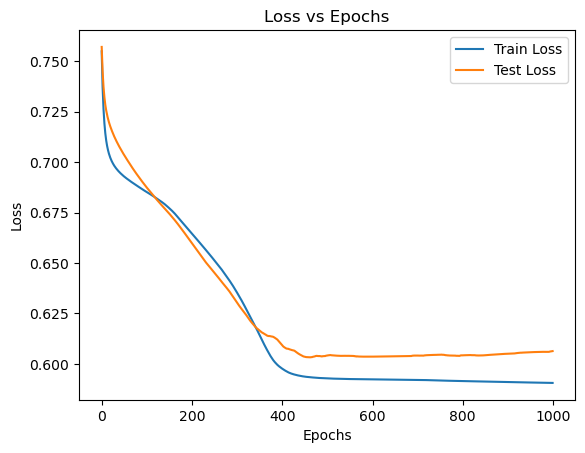

In [539]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## Plot

In [540]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]

In [541]:
x1_range = torch.linspace(min(x1), max(x1), 5)
x2_range = torch.linspace(min(x2), max(x2), 5)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)
X1_mesh, X2_mesh

(tensor([[-2.1570, -2.1570, -2.1570, -2.1570, -2.1570],
         [-1.1347, -1.1347, -1.1347, -1.1347, -1.1347],
         [-0.1123, -0.1123, -0.1123, -0.1123, -0.1123],
         [ 0.9101,  0.9101,  0.9101,  0.9101,  0.9101],
         [ 1.9324,  1.9324,  1.9324,  1.9324,  1.9324]]),
 tensor([[-2.0911, -0.9532,  0.1847,  1.3227,  2.4606],
         [-2.0911, -0.9532,  0.1847,  1.3227,  2.4606],
         [-2.0911, -0.9532,  0.1847,  1.3227,  2.4606],
         [-2.0911, -0.9532,  0.1847,  1.3227,  2.4606],
         [-2.0911, -0.9532,  0.1847,  1.3227,  2.4606]]))

In [542]:
z4 = model(X_train)
z4

tensor([[ 0.3302],
        [ 0.7278],
        [ 1.2611],
        [-0.5519],
        [-1.7736],
        [ 0.0101],
        [-1.0885],
        [ 0.3444],
        [ 0.6757],
        [-0.6532],
        [-2.2314],
        [ 0.1051],
        [-0.9886],
        [ 1.2564],
        [-1.9750],
        [ 1.1863],
        [-1.8554],
        [ 0.4550],
        [-0.0957],
        [ 1.0895],
        [ 0.5468],
        [-0.9689],
        [-1.0327],
        [-0.5490],
        [ 0.5300],
        [ 1.1997],
        [ 0.6404],
        [-0.3381],
        [-1.3738],
        [ 0.3948],
        [-0.3865],
        [-0.7140],
        [ 1.0578],
        [-0.5443],
        [ 0.9078],
        [ 0.3215],
        [ 0.5101],
        [ 0.4879],
        [-1.0060],
        [-0.8352],
        [ 0.3636],
        [ 0.9148],
        [-1.8887],
        [ 0.8199],
        [-1.7529],
        [ 0.9215],
        [ 0.8457],
        [-2.5734],
        [-0.5938],
        [ 0.3757],
        [ 0.5433],
        [-0.6726],
        [-0.

In [543]:
torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

tensor([[-2.1570, -2.0911],
        [-2.1570, -0.9532],
        [-2.1570,  0.1847],
        [-2.1570,  1.3227],
        [-2.1570,  2.4606],
        [-1.1347, -2.0911],
        [-1.1347, -0.9532],
        [-1.1347,  0.1847],
        [-1.1347,  1.3227],
        [-1.1347,  2.4606],
        [-0.1123, -2.0911],
        [-0.1123, -0.9532],
        [-0.1123,  0.1847],
        [-0.1123,  1.3227],
        [-0.1123,  2.4606],
        [ 0.9101, -2.0911],
        [ 0.9101, -0.9532],
        [ 0.9101,  0.1847],
        [ 0.9101,  1.3227],
        [ 0.9101,  2.4606],
        [ 1.9324, -2.0911],
        [ 1.9324, -0.9532],
        [ 1.9324,  0.1847],
        [ 1.9324,  1.3227],
        [ 1.9324,  2.4606]])

In [544]:
model(torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)).shape

torch.Size([25, 1])

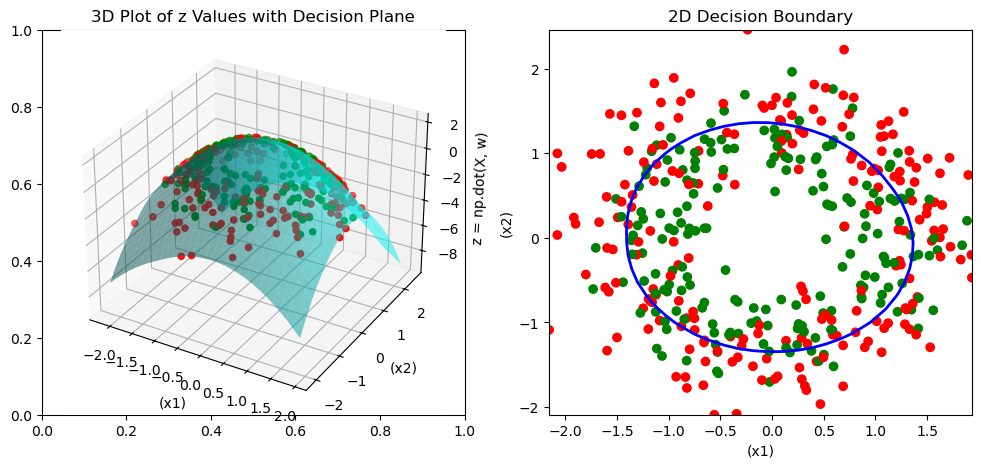

In [545]:
import numpy as np
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 30)
x2_range = torch.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z_mesh = Z_mesh.reshape(X1_mesh.shape)

# Compute z-plane (decision boundary)
ax1.plot_surface(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# # Compute decision boundary where z = 0
# x1_decision = torch.linspace(min(x1), max(x1), 100)
# x2_decision = (-w0 - w1 * x1_decision) / w2  # Solving w0 + w1*x1 + w2*x2 = 0

ax2.contour(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), levels=[0], colors='blue', linewidths=2)
# Plot decision boundary
#ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("(x1)")
ax2.set_ylabel("(x2)")
ax2.set_title("2D Decision Boundary")


# Show plot
plt.show()

# Build Neural Network and Activation Function

In [435]:
class Classification_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 6)
        self.block_2 = torch.nn.Linear(6, 1)
        

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 6) # w1 (6, 2)
        # Activation function
        a1 = torch.relu(z1) # (m, 6)
        z2 = self.block_2(a1) # (m, 1) # w2 (1, 6)
        return z2
    
model = Classification_model()
model

Classification_model(
  (block_1): Linear(in_features=2, out_features=6, bias=True)
  (block_2): Linear(in_features=6, out_features=1, bias=True)
)

In [436]:
loss_function1 = torch.nn.BCELoss()
loss_function2 = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)   

In [437]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 1000

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()

    # Compute loss
    training_loss1 = loss_function1(y_hat_prob, y_train)
    training_loss2 = loss_function2(z.squeeze(), y_train)

    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)
        y_hat_prob_test = torch.sigmoid(z_test).squeeze()

        # Compute loss
        test_loss1 = loss_function1(y_hat_prob_test, y_test)
        test_loss2 = loss_function2(z_test.squeeze(), y_test)
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f} | {training_loss2.item():.4f} , Test Loss: {test_loss1.item():.4f} | {test_loss2.item():.4f}")

Epoch 1/1000, Training Loss: 0.7045 | 0.7045 , Test Loss: 0.6965 | 0.6965
Epoch 2/1000, Training Loss: 0.7035 | 0.7035 , Test Loss: 0.6968 | 0.6968
Epoch 3/1000, Training Loss: 0.7026 | 0.7026 , Test Loss: 0.6972 | 0.6972
Epoch 4/1000, Training Loss: 0.7019 | 0.7019 , Test Loss: 0.6975 | 0.6975
Epoch 5/1000, Training Loss: 0.7012 | 0.7012 , Test Loss: 0.6979 | 0.6979
Epoch 6/1000, Training Loss: 0.7005 | 0.7005 , Test Loss: 0.6983 | 0.6983
Epoch 7/1000, Training Loss: 0.6999 | 0.6999 , Test Loss: 0.6986 | 0.6986
Epoch 8/1000, Training Loss: 0.6994 | 0.6994 , Test Loss: 0.6990 | 0.6990
Epoch 9/1000, Training Loss: 0.6989 | 0.6989 , Test Loss: 0.6994 | 0.6994
Epoch 10/1000, Training Loss: 0.6985 | 0.6985 , Test Loss: 0.6997 | 0.6997
Epoch 11/1000, Training Loss: 0.6980 | 0.6980 , Test Loss: 0.7001 | 0.7001
Epoch 12/1000, Training Loss: 0.6977 | 0.6977 , Test Loss: 0.7004 | 0.7004
Epoch 13/1000, Training Loss: 0.6973 | 0.6973 , Test Loss: 0.7007 | 0.7007
Epoch 14/1000, Training Loss: 0.69

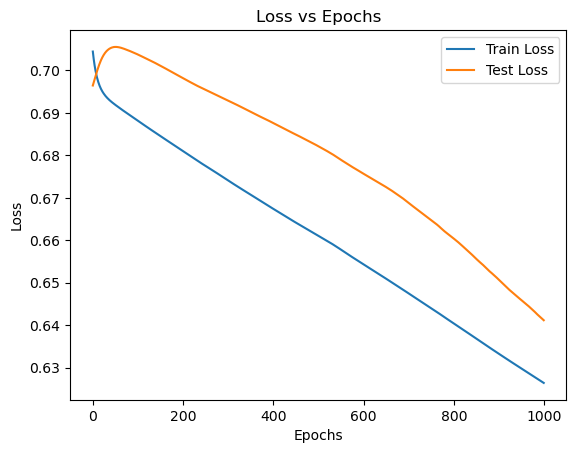

In [438]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## plot

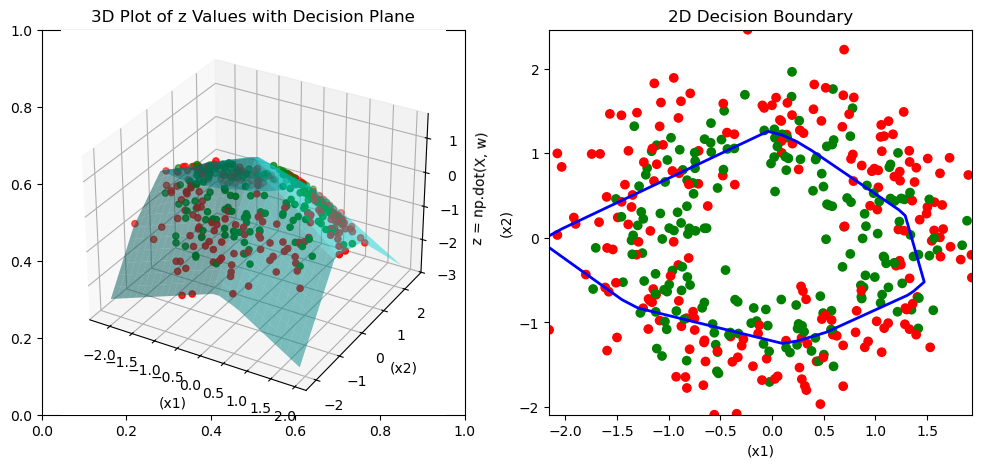

In [439]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]

x1_range = torch.linspace(min(x1), max(x1), 5)
x2_range = torch.linspace(min(x2), max(x2), 5)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)
X1_mesh, X2_mesh

import numpy as np
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 30)
x2_range = torch.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z_mesh = Z_mesh.reshape(X1_mesh.shape)

# Compute z-plane (decision boundary)
ax1.plot_surface(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# # Compute decision boundary where z = 0
# x1_decision = torch.linspace(min(x1), max(x1), 100)
# x2_decision = (-w0 - w1 * x1_decision) / w2  # Solving w0 + w1*x1 + w2*x2 = 0

ax2.contour(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), levels=[0], colors='blue', linewidths=2)
# Plot decision boundary
#ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("(x1)")
ax2.set_ylabel("(x2)")
ax2.set_title("2D Decision Boundary")


# Show plot
plt.show()
